In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('colorado_motor_vehicle_sales.csv')

In [3]:
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [4]:
df.shape


(501, 4)

In [5]:
df.dtypes

year        int64
quarter     int64
county     object
sales       int64
dtype: object

In [6]:
df.isnull().sum()

year       0
quarter    0
county     0
sales      0
dtype: int64

In [7]:
df.describe()

,year,quarter,sales
count,501.000000,501.000000,5.010000e+02
mean,2011.570858,2.502994,1.760585e+08
std,2.266599,1.120041,1.642055e+08
min,2008.000000,1.000000,6.274000e+06
25%,2010.000000,2.000000,6.148200e+07
50%,2012.000000,3.000000,1.385820e+08
75%,2014.000000,4.000000,2.241580e+08
max,2015.000000,4.000000,9.169100e+08


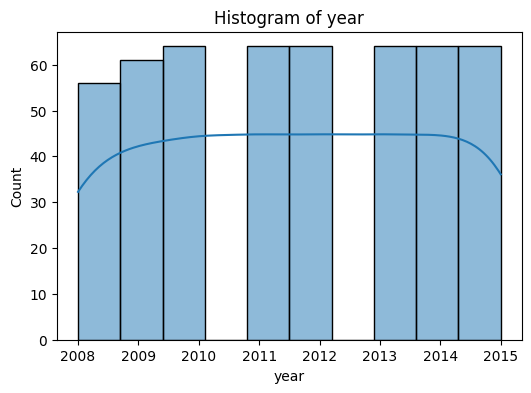

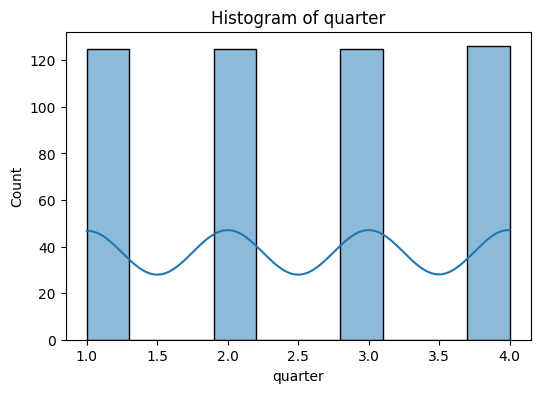

C:\Users\utkar\AppData\Local\Temp\ipykernel_14032\2818875979.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column,palette='viridis' )


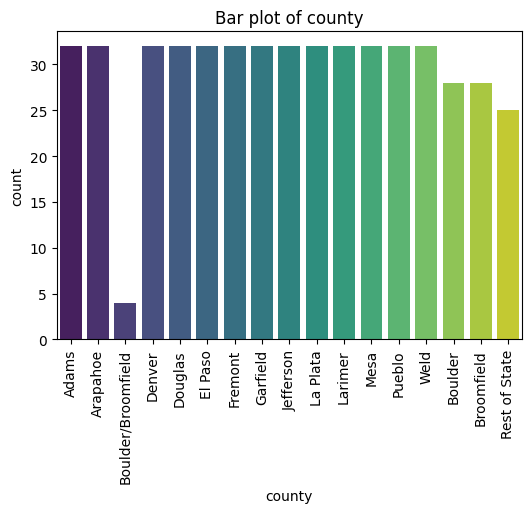

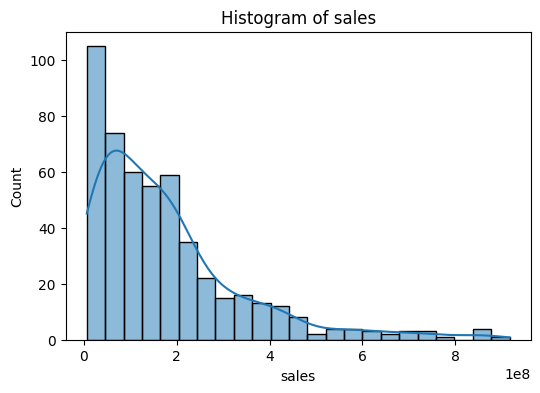

In [8]:
for column in df.columns:
   if pd.api.types.is_numeric_dtype(df[column]):
      plt.figure(figsize=(6, 4))
      sns.histplot(data=df, x=column, kde=True)
      plt.title(f"Histogram of {column}")
       
      plt.savefig('1.png')
      plt.show()
   elif df[column].dtype == 'object':
      plt.figure(figsize=(6, 4))
      sns.countplot(data=df, x=column,palette='viridis' )
      plt.title(f"Bar plot of {column}")
      plt.xticks(rotation=90)
      plt.savefig('2.png')
      plt.show()


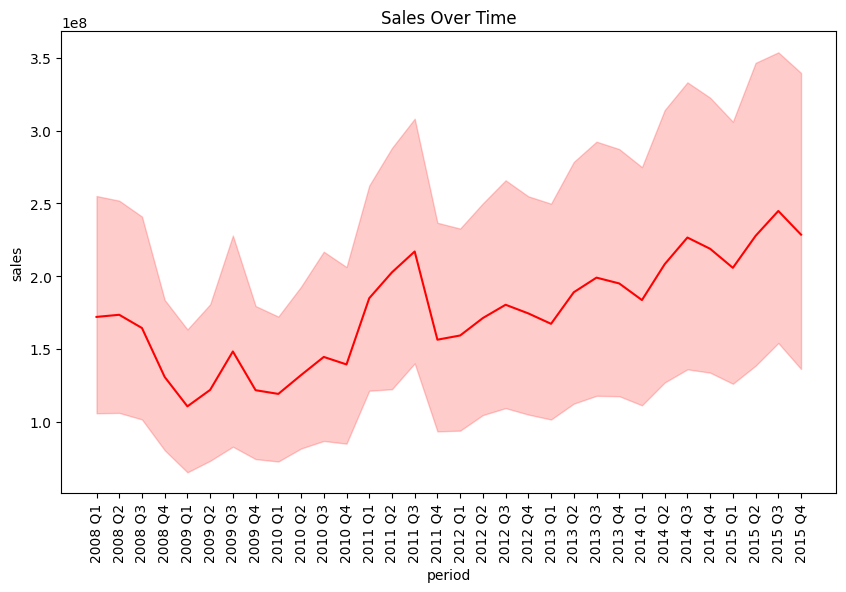

In [9]:
df['period'] = df['year'].astype(str) + ' Q' +df['quarter'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='period', y='sales',color="red")
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.savefig('3.png')
plt.show()

C:\Users\utkar\AppData\Local\Temp\ipykernel_14032\3810737324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


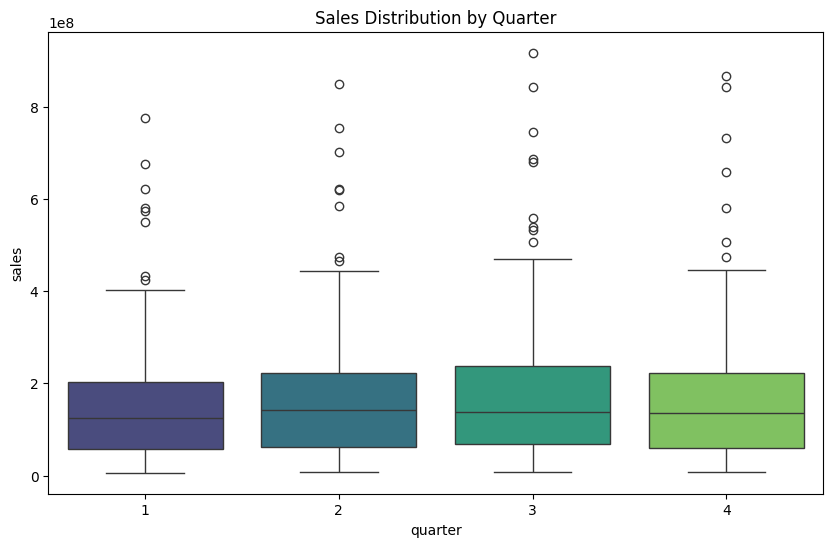

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, 
    x='quarter', 
    y='sales',
    palette='viridis'  
)
plt.title('Sales Distribution by Quarter')
plt.savefig('4.png')
plt.show()

In [11]:
import ipywidgets as widgets

def plot_sales_by_county(df, year, quarter):
  filtered_df = df[(df['year'] == year) & (df['quarter'] ==quarter)]
  county_sales =filtered_df.groupby('county')['sales'].sum().reset_index()
  county_sales_sorted = county_sales.sort_values('sales',ascending=False)
  plt.figure(figsize=(12, 6))
  sns.barplot(data=county_sales_sorted, x='county',y='sales', palette='viridis')
  plt.title(f'Sales by County for {year} Q{quarter}')
  plt.xticks(rotation=90)
  plt.ylabel('Total Sales')
  plt.xlabel('County')
  plt.savefig('5.png')
  plt.show()

In [12]:
year_widget = widgets.IntSlider(min=df['year'].min(),max=df['year'].max(), step=1, description='Year:')
quarter_widget = widgets.IntSlider(min=df['quarter'].min(),
max=df['quarter'].max(), step=1, description='Quarter:')
widgets.interact(lambda year, quarter: plot_sales_by_county(df,year, quarter), year=year_widget, quarter=quarter_widget)

interactive(children=(IntSlider(value=2008, description='Year:', max=2015, min=2008), IntSlider(value=1, descr…

<function __main__.<lambda>(year, quarter)>

In [13]:
df['county'] = df['county'].astype('category').cat.codes
X = df[['year', 'quarter', 'county']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 20402876.97387048


In [18]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],

'min_samples_split': [2, 5, 10]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5,
scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [17]:
print(f"Best parameters: {best_params}")

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 19981856.206187755
